<a href="https://colab.research.google.com/github/SimoneFinessi/geopandas/blob/main/geopandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [3]:
%matplotlib inline

import pandas as pd
import geopandas

In [4]:
countries=geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_admin_0_countries.zip?raw=true")
cities=geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_populated_places.zip?raw=true")
rivers=geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_50m_rivers_lake_centerlines.zip?raw=true")

In [5]:
countries.head(1)

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."


In [10]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

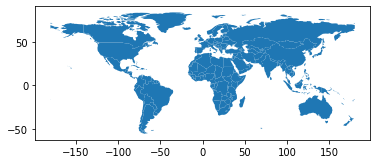

In [12]:
countries.plot()

In [11]:
# remove Antartica, as the Mercator projection cannot deal with the poles
countries = countries[(countries['name'] != "Antarctica")]

In [13]:
countries_mercator = countries.to_crs(epsg=3395)  # or .to_crs("EPSG:3395")

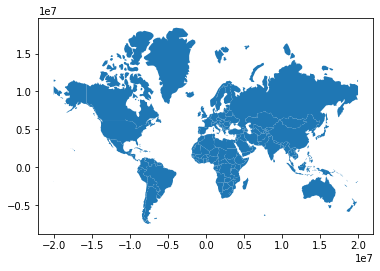

In [14]:
countries_mercator.plot()

# **esercizio 1**

In [24]:
districts=geopandas.read_file("https://raw.githubusercontent.com/jorisvandenbossche/geopandas-tutorial/main/data/paris_districts.geojson")

In [25]:
districts.head(1)

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ..."


In [26]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

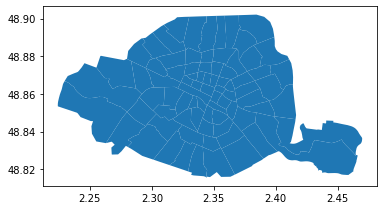

In [27]:
districts.plot()

In [44]:
districts.geometry.area

<ipython-input-44-43a277d7fe0b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts.geometry.area


0     0.000107
1     0.000051
2     0.000034
3     0.000033
4     0.000023
        ...   
75    0.000159
76    0.000099
77    0.000182
78    0.000196
79    0.000256
Length: 80, dtype: float64

In [40]:
districts_RGF93=districts.to_crs(epsg=2154)

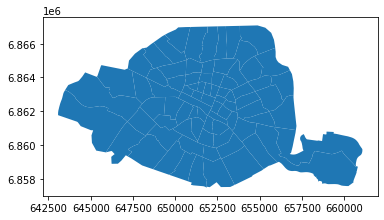

In [42]:
districts_RGF93.plot()

In [45]:
districts_RGF93.geometry.area/1e6

0     0.869001
1     0.412458
2     0.273697
3     0.269457
4     0.188012
        ...   
75    1.294988
76    0.806569
77    1.486971
78    1.599002
79    2.090904
Length: 80, dtype: float64

# **esercizio 2**

In [ ]:
!pip install contextily

In [48]:
import contextily

In [49]:
stations=geopandas.read_file("https://raw.githubusercontent.com/jorisvandenbossche/geopandas-tutorial/main/data/paris_bike_stations.geojson")

In [50]:
stations_webmercator=stations.to_crs(epsg=3857)

In [51]:
stations_webmercator

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (259324.887 6247620.771)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (267824.377 6249062.894)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (267742.135 6250378.469)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (271326.638 6250750.824)
4,43006 - MINIMES (VINCENNES),28,27,POINT (270594.689 6248007.705)
...,...,...,...,...
1221,12011 - CHARENTON,36,35,POINT (265227.474 6248579.501)
1222,13110 - MOULIN DE LA POINTE,22,4,POINT (262307.142 6244549.880)
1223,07006 - QUAI VOLTAIRE,32,25,POINT (259532.287 6250960.774)
1224,21311 - GAMBETTA (ISSY LES MOULINEAUX),55,47,POINT (253646.981 6245637.291)


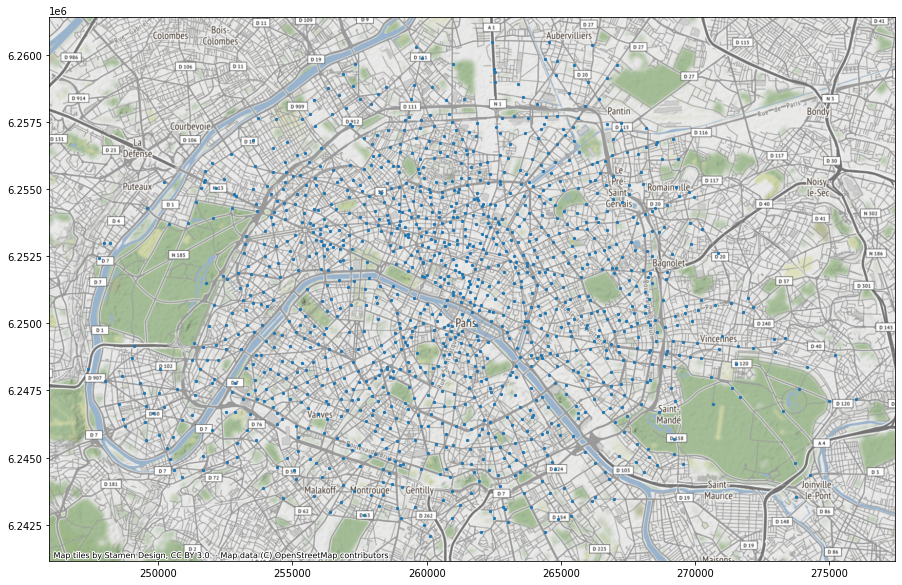

In [56]:
ax=stations_webmercator.plot(figsize=(20,10),markersize=5)
contextily.add_basemap(ax)